# Fine Tunning de YOLOv8 utilizando GroundingDINO para etiquetar




**Importante:** primero tienen que activar aceleración con GPU. Ir a Editar -> Configuración del notebook -> Seleccionar T4GPU en acelerador.

In [ ]:
import os
from IPython.display import Image, display

# Clonamos repo de GroundingDINO:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

HOME = os.getcwd()
%cd {HOME}/GroundingDINO
!pip install -r requirements.txt
!pip install -q -e .

# Descargamos pesos entrenados:
! wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

# Descargamos imagen de demo:
!mkdir tomatoes_dataset
!wget -q wget -q "https://drive.usercontent.google.com/download?id=1vbHqup5TL1cnm_iefyq5aDUA3lBDoQMh&export=download" -O tomatoes_dataset/tomatoes1.jpeg


Cloning into 'GroundingDINO'...
remote: Enumerating objects: 433, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 433 (delta 151), reused 130 (delta 126), pack-reused 232
Receiving objects: 100% (433/433), 12.86 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/GroundingDINO
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.

## Grounding DINO

In [ ]:
#Ejemplo de una predicción de GroundingDINO en una imagen de tomates

!python3 demo/inference_on_a_image.py \
    --config_file 'groundingdino/config/GroundingDINO_SwinT_OGC.py' \
    --checkpoint_path 'groundingdino_swint_ogc.pth' \
    --image_path 'tomatoes_dataset/tomatoes1.jpeg'  \
    --text_prompt 'tomato' \
    --box_threshold 0.35 \
    --text_threshold 0.01 \
    --output_dir 'outputs'

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
final text_encoder_type: bert-base-uncased
tokenizer_config.json: 100% 48.0/48.0 [00:00<00:00, 181kB/s]
config.json: 100% 570/570 [00:00<00:00, 2.60MB/s]
vocab.txt: 100% 232k/232k [00:00<00:00, 1.72MB/s]
tokenizer.json: 100% 466k/466k [00:00<00:00, 3.60MB/s]
model.safetensors: 100% 440M/440M [00:01<00:00, 233MB/s]
_IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarni

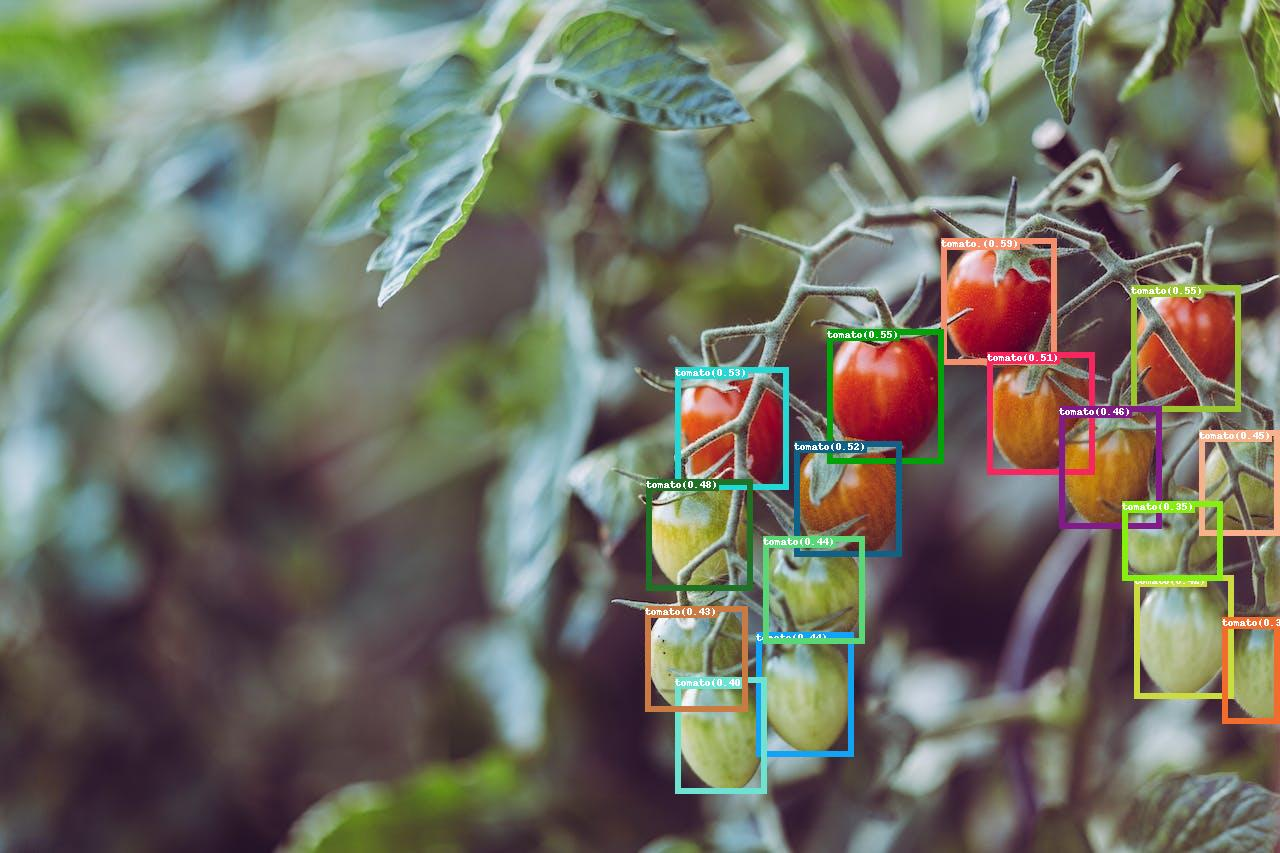

In [ ]:
display(Image(filename='outputs/pred.jpg'))

--2024-04-18 01:34:54--  https://c7.alamy.com/compes/g6jefn/muchos-coches-color-sobre-un-fondo-blanco-hecho-en-3d-rendering-g6jefn.jpg
Resolving c7.alamy.com (c7.alamy.com)... 3.163.125.57, 3.163.125.70, 3.163.125.77, ...
Connecting to c7.alamy.com (c7.alamy.com)|3.163.125.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘autos.jpg’

autos.jpg               [ <=>                ] 135.35K  --.-KB/s    in 0.02s   

Last-modified header invalid -- time-stamp ignored.
2024-04-18 01:34:54 (7.86 MB/s) - ‘autos.jpg’ saved [138600]



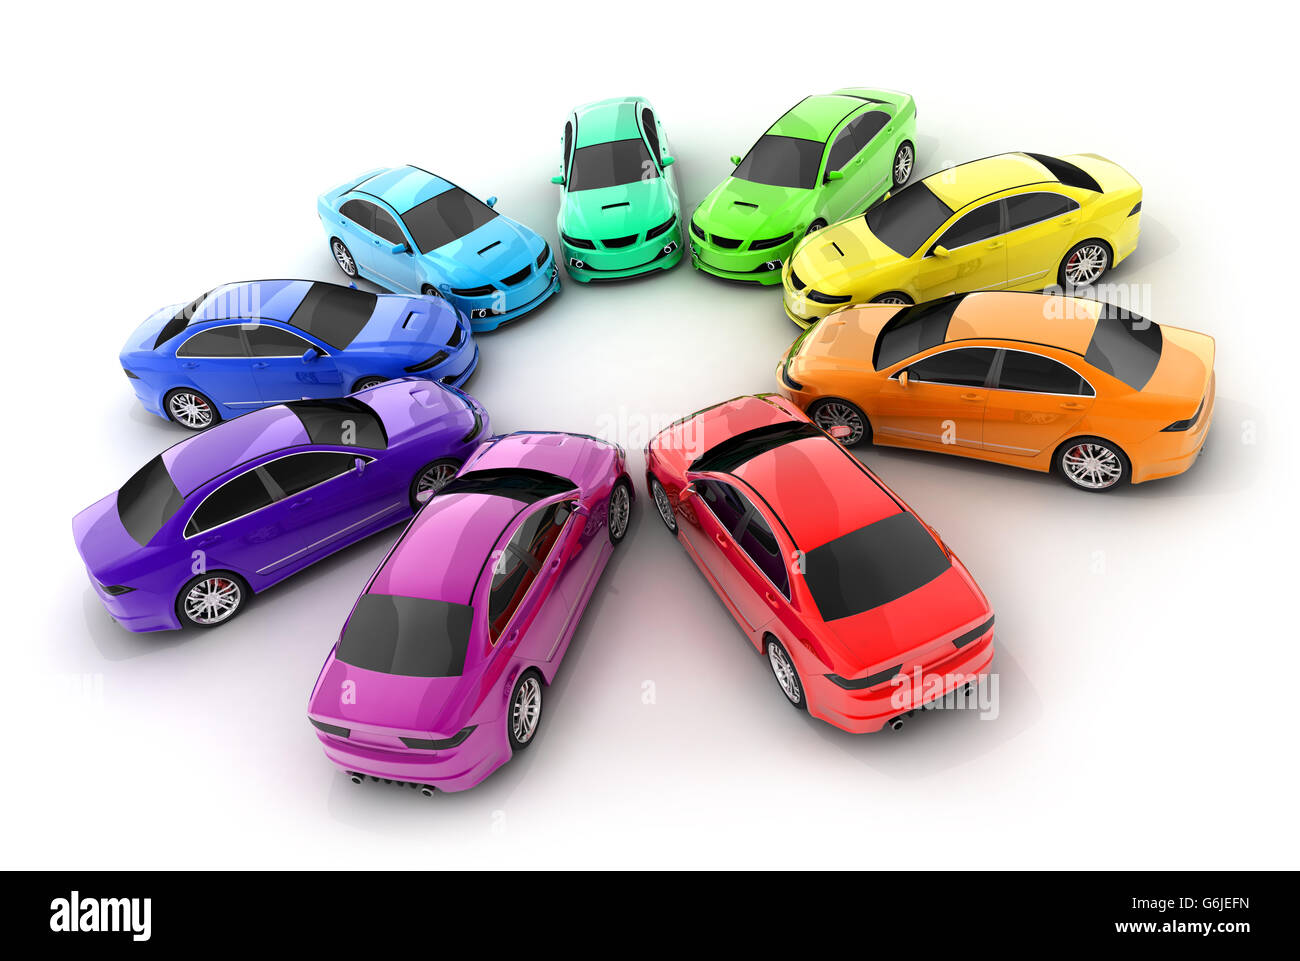

In [ ]:
# Vamos a ver un segundo ejemplo con autos.
!wget https://c7.alamy.com/compes/g6jefn/muchos-coches-color-sobre-un-fondo-blanco-hecho-en-3d-rendering-g6jefn.jpg -O autos.jpg
display(Image(filename='autos.jpg'))

Prueben ejecutando GroundingDINO sobre la imagen de autos y cambiando el text_prompt.

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
final text_encoder_type: bert-base-uncased
_IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentran

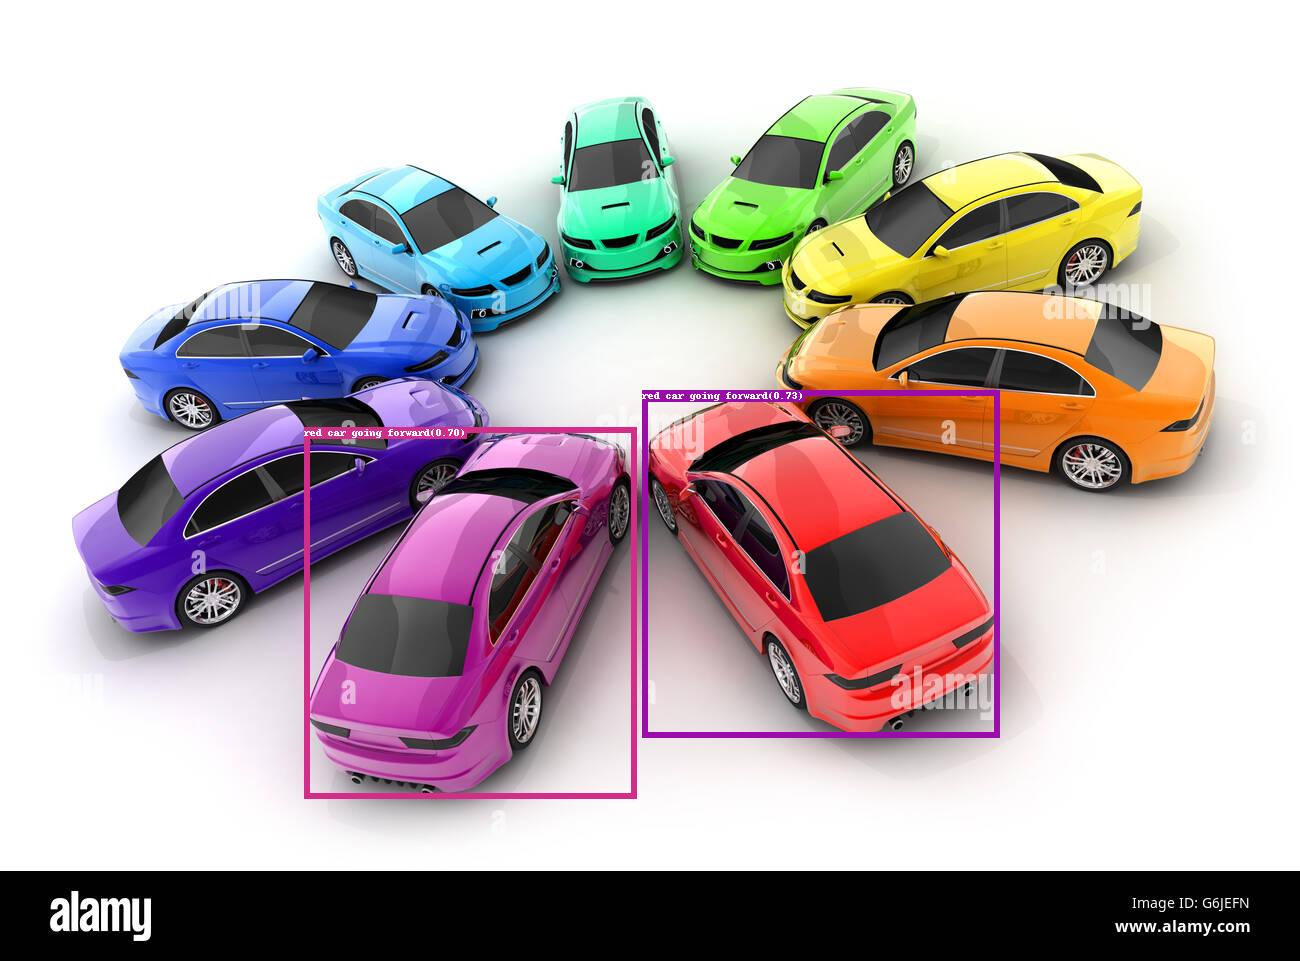

In [ ]:
#TODO: completar para la predicción en la imagen de autos, probar diferentes prompts: cómo cambia con 'car', 'red car' y 'red car going forward'

!python3 demo/inference_on_a_image.py \
    --config_file 'groundingdino/config/GroundingDINO_SwinT_OGC.py' \
    --checkpoint_path 'groundingdino_swint_ogc.pth' \
    --image_path '/content/GroundingDINO/autos.jpg'  \
    --text_prompt 'red car going forward' \
    --box_threshold 0.35 \
    --text_threshold 0.01 \
    --output_dir 'outputs'

display(Image(filename='outputs/pred.jpg'))

In [ ]:
!pip install fiftyone
!pip install typer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 15.5 MB/s eta 0:00:00
  Installing build depende

In [ ]:
#Cargamos el modelo con los pesos para generar labels en el dataset de comida.

from groundingdino.util.inference import load_model, load_image, predict, annotate

def run_dino(dino, image, text_prompt='food', box_threshold=0.4, text_threshold=0.1):
    boxes, logits, phrases = predict(
        model = dino,
        image = image,
        caption = text_prompt,
        box_threshold = box_threshold,
        text_threshold = text_threshold
    )
    return boxes, logits, phrases

dino = load_model('groundingdino/config/GroundingDINO_SwinT_OGC.py', 'groundingdino_swint_ogc.pth')

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


### Creamos las etiquetas en el dataset

In [ ]:
def annotate(dino, data, data_size, data_dir):

    image_dir = f'{data_dir}/images'
    label_dir = f'{data_dir}/labels'
    os.makedirs(image_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)

    for i, d in enumerate(data):
        image_path = f'{image_dir}/{i:06d}.png'
        label_path = f'{label_dir}/{i:06d}.txt'
        image = d['image'].resize((640, 640))
        image.save(image_path)

        image_source, image = load_image(image_path)
        boxes, logits, phrases = run_dino(dino, image)

        label = ['0 ' + ' '.join(list(map(str, b))) for b in boxes.tolist()]
        label = '\n'.join(label)
        with open(label_path, 'w') as f:
            f.write(label)

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset


train_data = load_dataset('food101', split='train[:3000]')

val_data = load_dataset('food101', split='validation[:1000]')

data = {"train": train_data, "validation": val_data}


Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

Las siguientes celdas crean las labels para train y test.

Si está tardando mucho pueden frenar la ejecución después de un par de minutos en lugar de etiquetar todo el dataset.

In [ ]:
annotate(dino, data['train'], 3000, 'data/train') #Anotación de labels para train

In [ ]:
annotate(dino, data['validation'], 1000, 'data/valid') #Anotación de labels para validación

## YOLO
Entrenamos el modelo YOLO con las anotaciones de GroundDINO

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Para el entrenamiento, tenemos que hacer un archivo de configuración. En este archivo le decimos las categorías que vamos a predecir y la ruta hacia train y validación.

In [ ]:
import yaml
config = {
    'names': ['food'],
    'nc': 1,
    'train': '/content/GroundingDINO/data/train/images',
    'val': '/content/GroundingDINO/data/valid/images'
}

with open('data/data.yaml', 'w') as f:
    yaml.dump(config, f)

Entrenamos sobre los pesos de YOLO con el método `yolo.train()`.

In [ ]:
yolo = YOLO("yolov8n.pt")
yolo.train(data="data/data.yaml", epochs=10)
valid_results = yolo.val()
print(valid_results)

100%|██████████| 6.23M/6.23M [00:00<00:00, 101MB/s]


Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


AMP: checks passed ✅


train: Scanning /content/GroundingDINO/data/train/labels... 3000 images, 98 backgrounds, 0 corrupt: 100%|██████████| 3000/3000 [00:05<00:00, 516.55it/s]


train: New cache created: /content/GroundingDINO/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/GroundingDINO/data/valid/labels... 1000 images, 20 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:03<00:00, 277.64it/s]

val: New cache created: /content/GroundingDINO/data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       1/10      3.27G     0.7797       1.79       1.42         19        640: 100%|██████████| 188/188 [01:31<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]


                   all       1000       1719      0.647      0.671       0.69      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       2/10      3.02G     0.8749      1.368      1.528         10        640: 100%|██████████| 188/188 [01:21<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


                   all       1000       1719      0.701      0.633      0.707      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       3/10      3.02G     0.8673      1.194      1.516         14        640: 100%|██████████| 188/188 [01:23<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


                   all       1000       1719      0.574      0.556      0.576      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       4/10      3.02G     0.8502      1.109      1.505         12        640: 100%|██████████| 188/188 [01:20<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]


                   all       1000       1719      0.668      0.677      0.726      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       5/10      3.03G     0.7488     0.9905      1.411         12        640: 100%|██████████| 188/188 [01:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.95it/s]

                   all       1000       1719      0.769      0.726      0.821      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       6/10      3.01G     0.6859     0.9344      1.353         14        640: 100%|██████████| 188/188 [01:21<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all       1000       1719      0.713      0.735      0.773      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       7/10      3.01G     0.6127     0.8623      1.295         16        640: 100%|██████████| 188/188 [01:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


                   all       1000       1719      0.762      0.756      0.826      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       8/10      3.01G     0.5733     0.8119      1.249         12        640: 100%|██████████| 188/188 [01:20<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]

                   all       1000       1719      0.778      0.777      0.858       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
       9/10      3.03G     0.5266     0.7552      1.206         12        640: 100%|██████████| 188/188 [01:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]

                   all       1000       1719      0.788      0.786      0.865       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/188 [00:00<?, ?it/s]UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
      10/10      3.01G     0.4776     0.7164      1.161         15        640: 100%|██████████| 188/188 [01:21<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]

                   all       1000       1719      0.808      0.794      0.877      0.751



10 epochs completed in 0.284 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]


                   all       1000       1719      0.809      0.793      0.877      0.751
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/GroundingDINO/data/valid/labels.cache... 1000 images, 20 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]


                   all       1000       1719      0.808      0.794      0.877      0.752
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78e4af3fdcc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

### Comparación de nuestro modelo

Vamos a comparar nuestro modelo tuneado contra YOLO normal.

Les deje 4 imagenes de interner para que prueben y analicen la diferencia entre el modelo original y nuestro tuneado. ¿Qué diferencias encuentran?

In [ ]:
from ultralytics import YOLO
from PIL import Image as Img
from PIL import ImageTk

# Cargamos los dos modelos
modelo_original = YOLO('yolov8n.pt')
modelo_tuneado = YOLO('/content/GroundingDINO/runs/detect/train/weights/best.pt')

imagen = 'https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VzvFyoTUMecfSyEQZ3fqDg.png'
#imagen = 'https://ae01.alicdn.com/kf/Saab8207bd19f4ddaa559cdd6bf19a50fG.jpeg_640x640Q90.jpeg_.webp'
#imagen = 'https://previews.123rf.com/images/smaglov/smaglov1206/smaglov120600910/14163853-bandeja-de-comida-en-el-avi%C3%B3n.jpg'
#imagen = 'https://www.shutterstock.com/image-photo/minimal-fast-food-tray-top-600nw-2290762729.jpg'

resultado_1 = modelo_original(imagen)
resultado_2 = modelo_tuneado(imagen)

for i, r in enumerate(resultado_1):
    im_bgr = r.plot()
    im_rgb = Img.fromarray(im_bgr[..., ::-1])

    # Guardar resultados
    r.save(filename='resultado_1.jpg')

for i, r in enumerate(resultado_2):
    im_bgr = r.plot()
    im_rgb = Img.fromarray(im_bgr[..., ::-1])

    # Guardar resultados
    r.save(filename='resultado_2.jpg')

100%|██████████| 102k/102k [00:00<00:00, 12.3MB/s]

image 1/1 /content/GroundingDINO/1*VzvFyoTUMecfSyEQZ3fqDg.png: 480x640 3 bowls, 3 sandwichs, 1 carrot, 1 dining table, 115.0ms
Speed: 3.5ms preprocess, 115.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)



Found https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VzvFyoTUMecfSyEQZ3fqDg.png locally at 1*VzvFyoTUMecfSyEQZ3fqDg.png
image 1/1 /content/GroundingDINO/1*VzvFyoTUMecfSyEQZ3fqDg.png: 480x640 5 foods, 14.6ms
Speed: 2.3ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


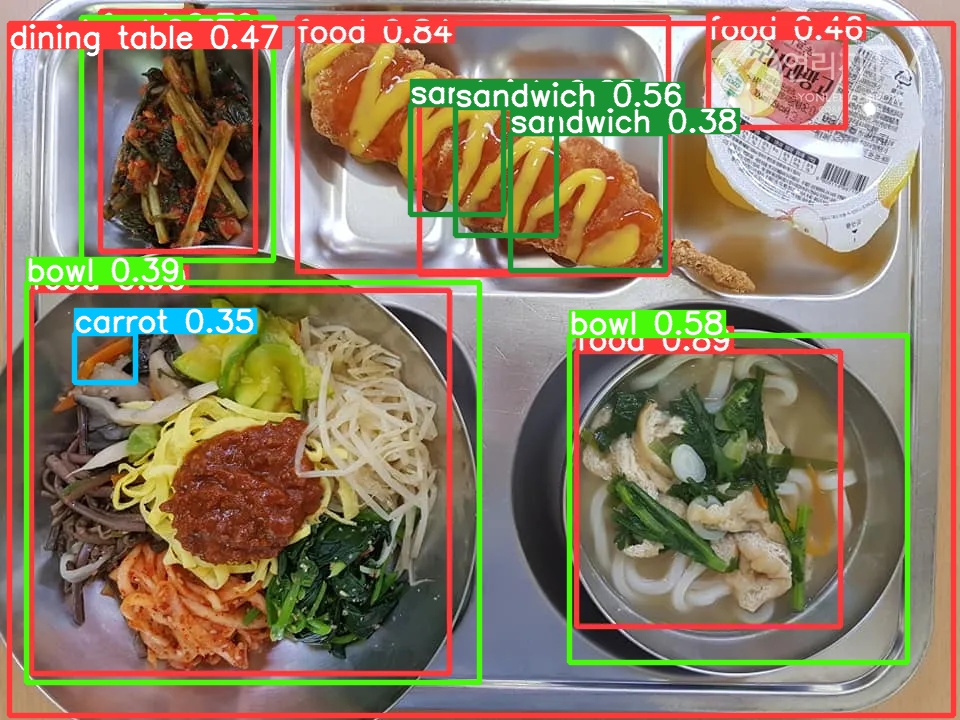

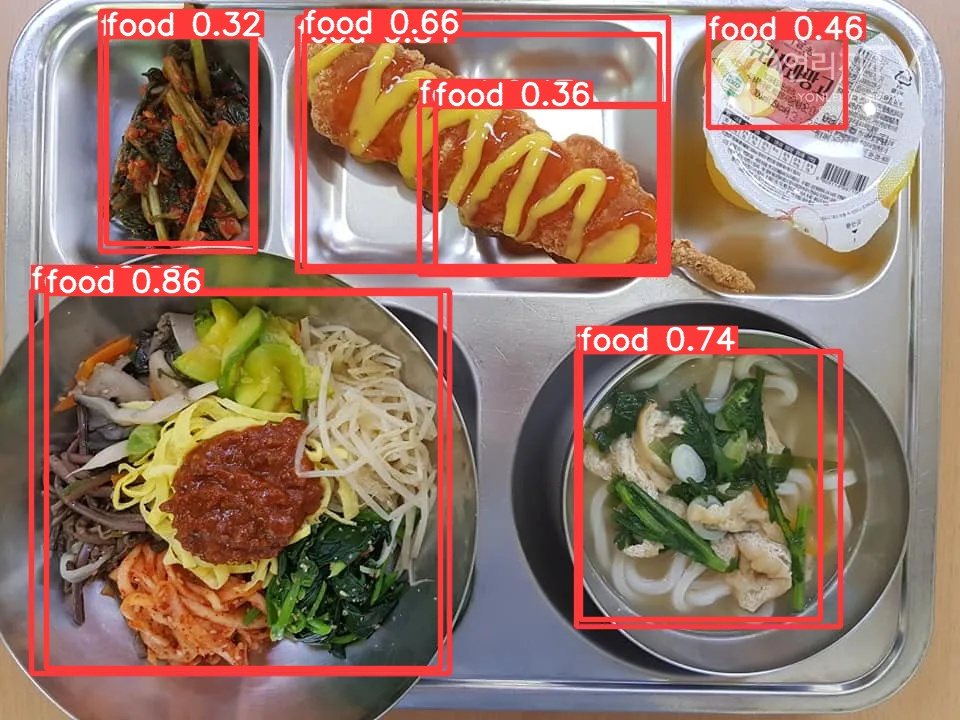

In [ ]:
from IPython.display import Image, display
display(Image(filename='resultado_1.jpg'))
display(Image(filename='resultado_2.jpg'))



Como ejercicio pueden intentar buscar otra foto en internet en donde el modelo tuneado detecte comida y el modelo original detecte otras cosas.